# Projeto: Ligações para o 911


* lat: latitude
* lng: longitude
* desc: Description of Emergency
* zip: ZIP Code
* title: Title of Emergency
* timeStamp: Date and time of the call
* twp: Town
* addr: Adress
* e: 


# Importando bibliotecas e lendo o dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import os
print(os.listdir("../input"))


['911.csv']


In [2]:
df = pd.read_csv("../input/911.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423909 entries, 0 to 423908
Data columns (total 9 columns):
lat          423909 non-null float64
lng          423909 non-null float64
desc         423909 non-null object
zip          371780 non-null float64
title        423909 non-null object
timeStamp    423909 non-null object
twp          423750 non-null object
addr         423909 non-null object
e            423909 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 29.1+ MB


In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


# Análise exploratória

top 5 CEPs nas chamadas 911.

In [5]:
df['zip'].value_counts().head(5)

19401.0    28656
19464.0    27948
19403.0    21631
19446.0    20496
19406.0    14097
Name: zip, dtype: int64

5 principais municípios nas chamadas 911

In [6]:
df['twp'].value_counts().head(5)

LOWER MERION    36441
ABINGTON        25835
NORRISTOWN      23883
UPPER MERION    22694
CHELTENHAM      19629
Name: twp, dtype: int64

códigos de título exclusivos.

In [7]:
df['title'].nunique()

141

** Separando coluna title em duas colunas para separar o tipo de ocorrência e a descrição. **

In [8]:
df['Reason'] = df['title'].apply(lambda title: title.split(':')[0])

In [9]:
df['Title2'] = df['title'].apply(lambda title: title.split(':')[1])

In [10]:
df['Reason'].value_counts()

EMS        208676
Traffic    151458
Fire        63775
Name: Reason, dtype: int64

In [11]:
df['Title2'].value_counts().head()

 VEHICLE ACCIDENT -    98401
 DISABLED VEHICLE -    31871
 FIRE ALARM            24459
 VEHICLE ACCIDENT      24081
 FALL VICTIM           21258
Name: Title2, dtype: int64

** Número de chamados por tipo **

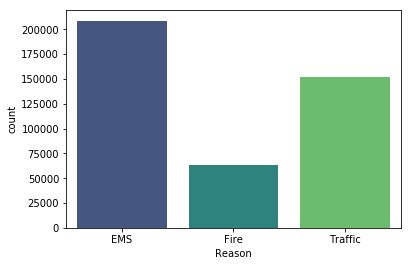

In [12]:
sns.countplot(x='Reason',data=df,palette='viridis')

** Cidades que tiveram mais chamados **

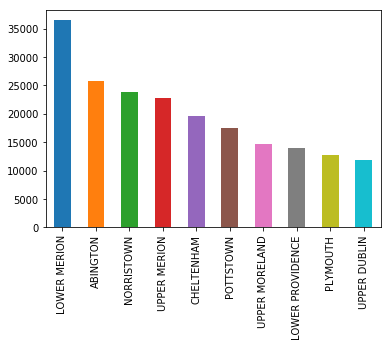

In [13]:
df['twp'].value_counts().head(10).plot.bar()

 ** top 10 cidades com maior numero de chamados por Tipo **

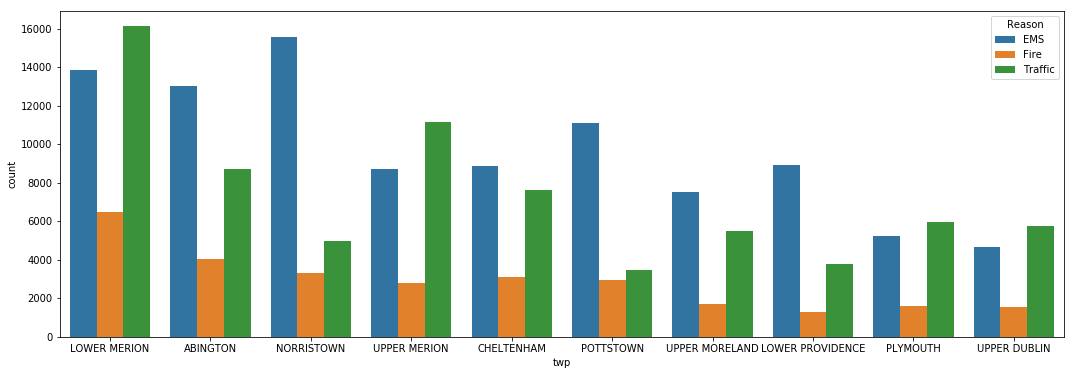

In [14]:
plt.figure(figsize=(18,6))
sns.countplot( x='twp',data=df,order=df['twp'].value_counts().index[:10], hue='Reason')

** a coluna timestamps está em string vamos tranformar-la em DateTime **

In [15]:
type(df['timeStamp'].iloc[0])

str

In [17]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [18]:
df['Hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['Month'] = df['timeStamp'].apply(lambda time: time.month)
df['Day of Week'] = df['timeStamp'].apply(lambda time: time.dayofweek)

In [19]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [20]:
df['Day of Week'] = df['Day of Week'].map(dmap)

** Número de chamados pelo dia da semana **

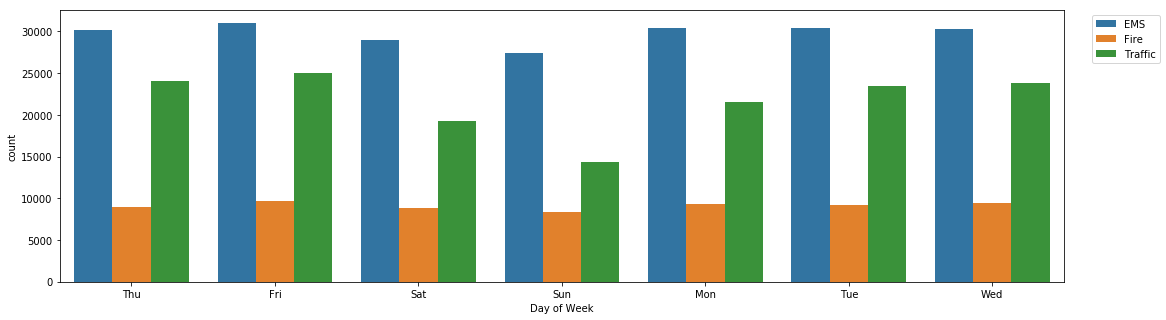

In [29]:
plt.figure(figsize=(18,5))
sns.countplot(x='Day of Week',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.10, 1))

** Número de chamado pelo mês **

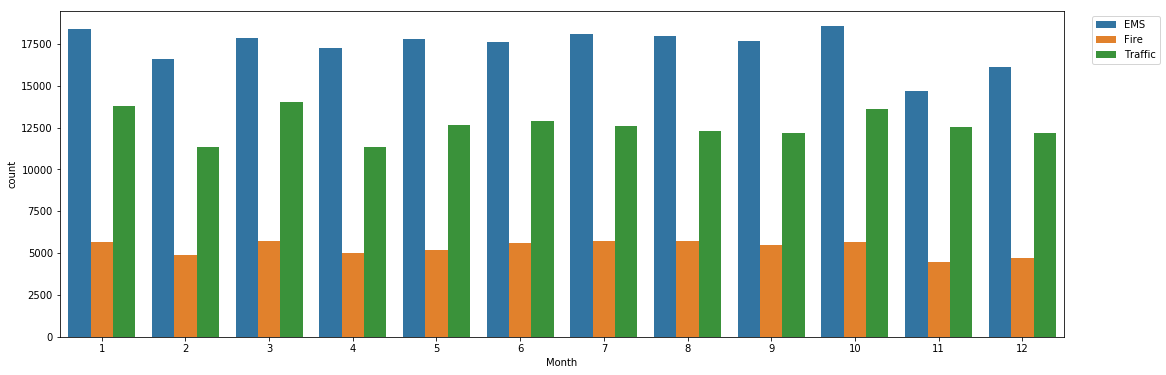

In [30]:
plt.figure(figsize=(18,6))
sns.countplot(x='Month',data=df,hue='Reason')
plt.legend(bbox_to_anchor=(1.10, 1))